# Pokemon type Clustering

## 1. Main objectives

Data has been obtained from https://www.kaggle.com/abcsds/pokemon

## 2. Description of the data

In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

filepath = 'Pokemon.csv'

data = pd.read_csv(filepath, sep = ',')

data.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


Each column corresponds to the following:

**Number**: The ID for each pokemon

**Name**: The name of each pokemon

**Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks

**Type 2**: Some pokemon are dual type and have 2

**Total**: Sum of all stats that come after this, a general guide to how strong a pokemon is

**HP**: Hit points, or health, defines how much damage a pokemon can withstand before fainting

**Attack**: The base modifier for normal attacks (eg. Scratch, Punch)

**Defense**: The base damage resistance against normal attacks

**SP Atk**: Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

**SP Def**: Special defense, the base damage resistance against special attacks

**Speed**: Determines which pokemon attacks first each round

**Generation**: The generation of games where the pokemon was first introduced

**Legendary**: Some pokemon are much rarer than others, and are dubbed "legendary"

**Inspiration: The type of a pokemon cannot be inferred only by its Attack and Defense. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.**

In [2]:
data.shape

(1072, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


## 3. Feature engineering

In [4]:
data['type2'].isnull().sum()

498

In [5]:
data['type2'] = data['type2'].replace(np.nan, 'None')
data['type2'].unique() #shan reemplaçat

array(['Poison', 'None', 'Flying', 'Dragon', 'Water', 'Normal', 'Psychic',
       'Steel', 'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice',
       'Dark', 'Ghost', 'Rock', 'Fire', 'Bug'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       1072 non-null   object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


we will need to one-hot-encode the type 1 and type 2 data. The name of the pokemon will be removed.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = data.copy()

data = data.drop(['name', 'number', 'type1', 'type2', 'legendary', 'generation'], axis = 1)

#obj_cols = [x for x in data.columns if x in ['type1', 'type2', 'legendary']]
#float_cols = [x for x in data.columns if x not in ['type1', 'type2', 'legendary']]

#for col in obj_cols:
#    data[col] = le.fit_transform(data[col])

In [8]:
data

,total,hp,attack,defense,sp_attack,sp_defense,speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,525,80,82,83,100,100,80
...,...,...,...,...,...,...,...
1067,580,100,145,130,65,110,30
1068,580,100,65,60,145,80,130
1069,500,100,80,80,80,80,80
1070,680,100,165,150,85,130,50


Now we drop the ID column.

Let's first take a look to the correlations:

In [9]:
corr_mat = data.corr()

for x in range(len(data.columns)):
    corr_mat.iloc[x,x] = 0

corr_mat.abs().idxmax()

total         attack
hp             total
attack         total
defense        total
sp_attack      total
sp_defense     total
speed          total
dtype: object

In [10]:
skew_columns = data.skew().sort_values(ascending = False)

# mirem quins tenen l'skew major de 0.75, i que per tant hauran de ser retocats.
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

hp            1.760494
defense       1.143146
sp_defense    0.926515
dtype: float64

In [11]:
for col in skew_columns.index:
    data[col] = np.log1p(data[col])

In [12]:
from sklearn.preprocessing import MinMaxScaler

float_cols = [x for x in data.columns]

mm = MinMaxScaler()

data[float_cols] = mm.fit_transform(data[float_cols])

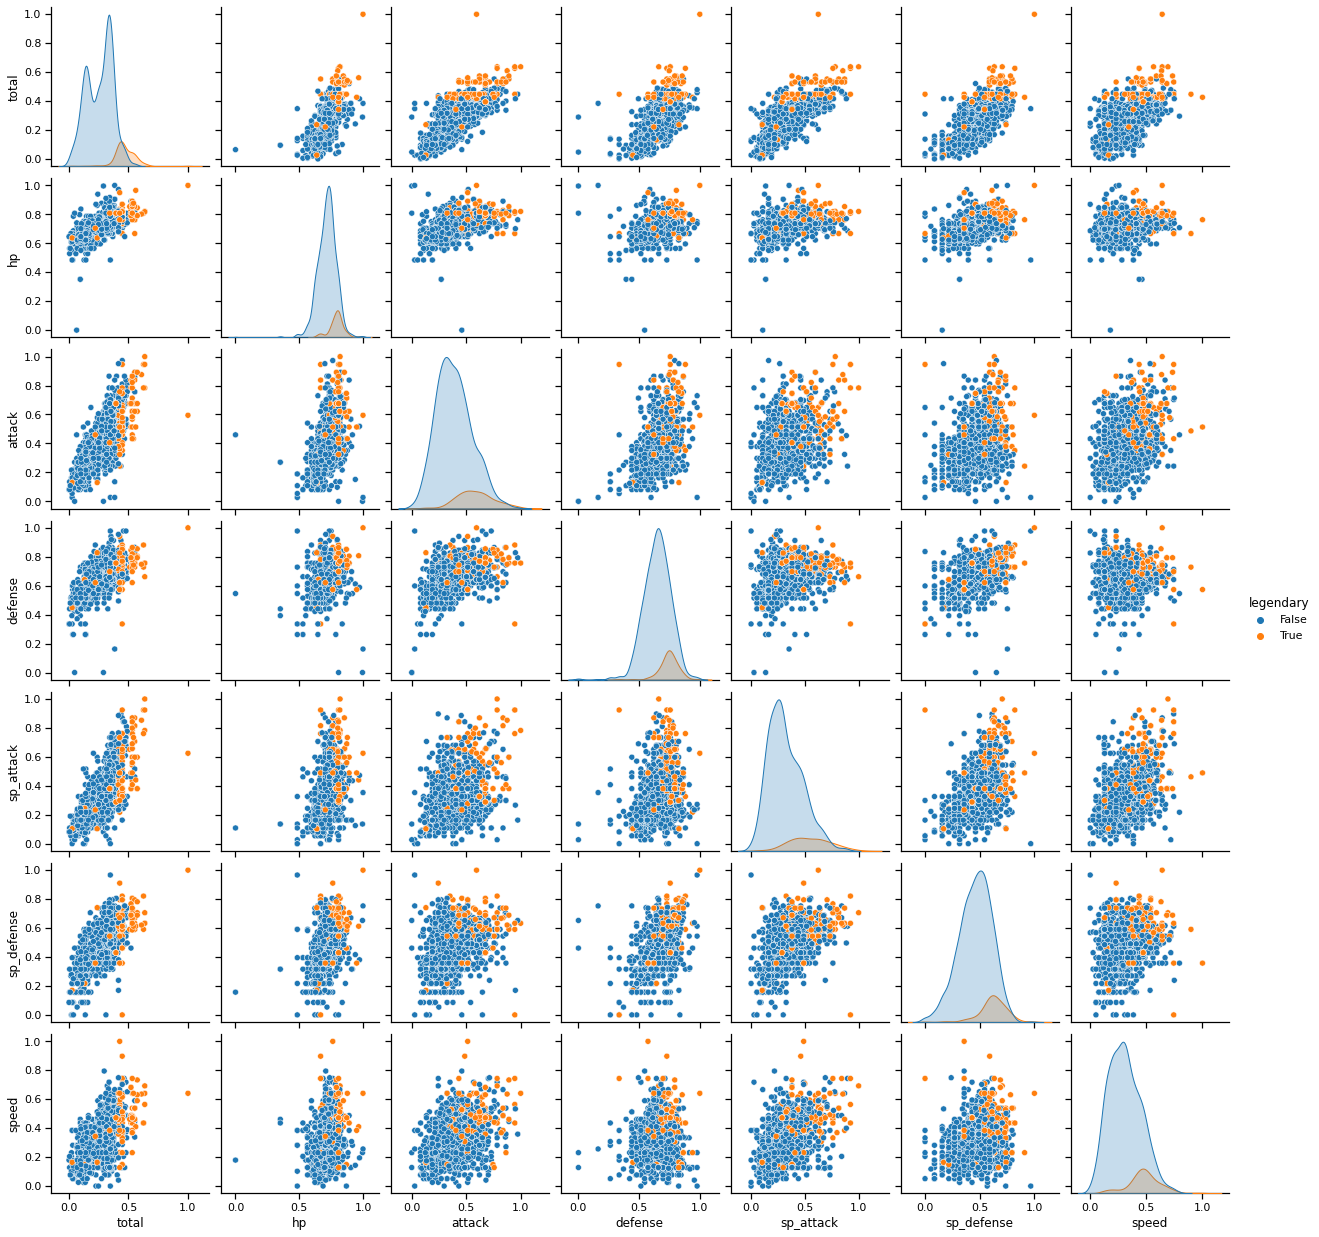

In [13]:
sns.set_context('notebook')

data['legendary'] = df['legendary']
sns.pairplot(data[float_cols + ['legendary']], hue = 'legendary')

In [14]:
data = data.drop('legendary', axis = 1)

In [15]:
data

,total,hp,attack,defense,sp_attack,sp_defense,speed
0,0.150526,0.646223,0.237838,0.567873,0.298913,0.461574,0.205128
1,0.242105,0.704391,0.308108,0.633990,0.380435,0.544121,0.282051
2,0.368421,0.762836,0.416216,0.706822,0.489130,0.633068,0.384615
3,0.473684,0.762836,0.513514,0.811133,0.608696,0.705892,0.384615
4,0.368421,0.762836,0.416216,0.706822,0.489130,0.633068,0.384615
...,...,...,...,...,...,...,...
1067,0.426316,0.808316,0.756757,0.825841,0.298913,0.671122,0.128205
1068,0.426316,0.808316,0.324324,0.621131,0.733696,0.544121,0.641026
1069,0.342105,0.808316,0.405405,0.697082,0.380435,0.544121,0.384615
1070,0.531579,0.808316,0.864865,0.863895,0.407609,0.737898,0.230769


## 4. Three variations of unsupervised model (Clustering)

### 4.1 K-means

In [16]:
from sklearn.cluster import KMeans
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state= 42)
    km = km.fit(data)
    km_list.append(pd.Series({'clusters': clust, 'inertia':km.inertia_, 'model': km}))    

In [17]:
plot_data = pd.concat(km_list, axis = 1).T
plot_data = plot_data[['clusters', 'inertia']].set_index('clusters')
plot_data.head(4)

,inertia
clusters,
1,156.274
2,97.0283
3,80.7911
4,70.9049


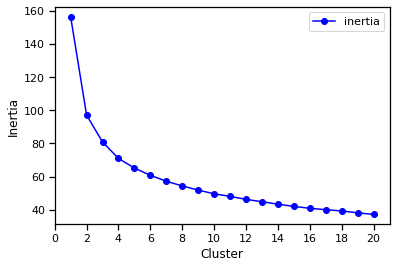

In [18]:
ax = plot_data.plot(marker = 'o', color = 'blue')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [19]:
# Em quedo amb 4 clusters
km = KMeans(n_clusters=4, random_state= 42)
km = km.fit(data[float_cols])
data['kmeans'] = km.predict(data[float_cols])

<AxesSubplot:xlabel='total', ylabel='attack'>

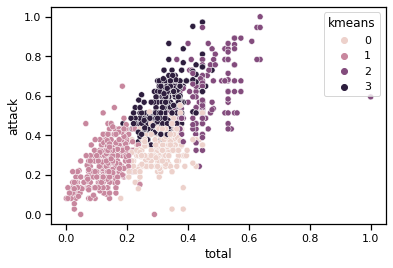

In [20]:
sns.scatterplot(data=data, x="total", y="attack", hue="kmeans")

### 4.2 Agglomerative Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
agg = agg.fit(data[float_cols])

# fem igual que abans una nova columna amb els labels dels clusters
data['agg'] = agg.fit_predict(data[float_cols])

<AxesSubplot:xlabel='total', ylabel='attack'>

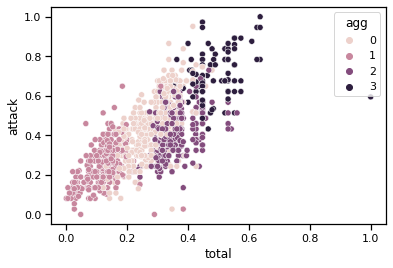

In [22]:
sns.scatterplot(data=data, x="total", y="attack", hue="agg")

The cluster differentiation in not that clear

### 4.3 DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.2, min_samples=15).fit(data[float_cols])
clustering_labels = db.fit_predict(data[float_cols])

data['dbscan'] = clustering_labels

In [24]:
data['dbscan'].value_counts()

 0    986
-1     86
Name: dbscan, dtype: int64

<AxesSubplot:xlabel='total', ylabel='attack'>

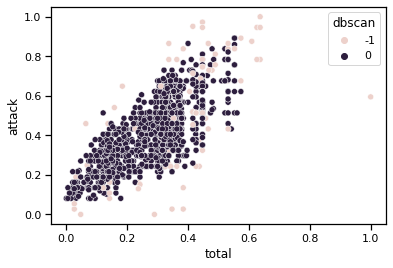

In [25]:
sns.scatterplot(data=data, x="total", y="attack", hue="dbscan")

Choosing the parameters is really complicated. Nonetheless, visually we could see that at least we have 2 clusters, but DBSCAN is not capable of determining them well, this is because **we have different cluster densities**. 

## 5. Which model is recommended?

## 6. Future suggestions